[24-07-17 10:08:41] Checking Training...
Latest epoch: 499


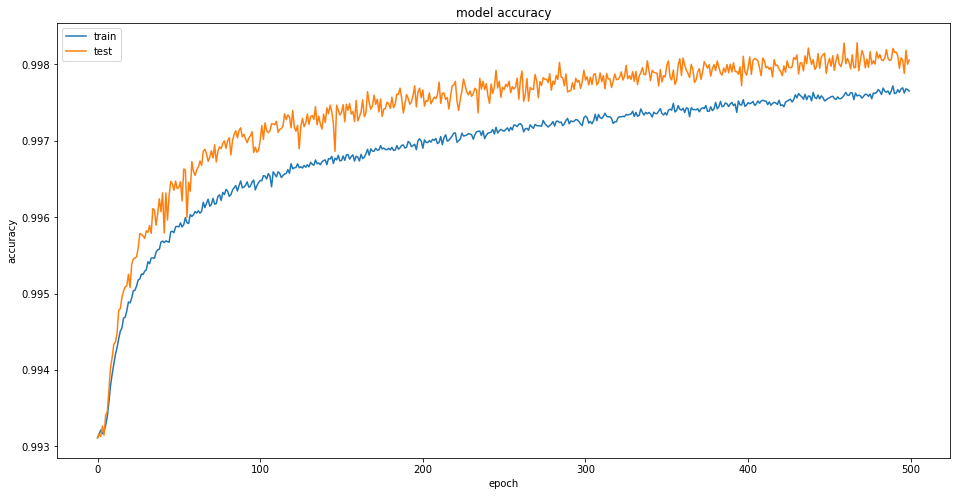

Min Validation Loss Epoch:


,epoch,acc,loss,val_acc,val_loss
437,437,0.997587,0.012469,0.998215,0.010719


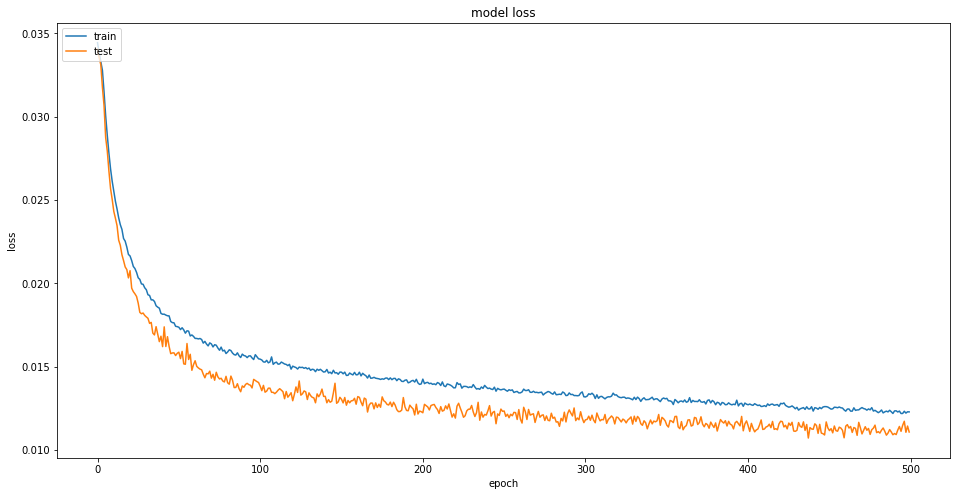

KeyboardInterrupt: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import schedule
import time
from IPython import display
from datetime import datetime

%matplotlib inline


def job():
    display.clear_output(wait=True)
    start = datetime.now()
    print("[{0}] Checking Training...".format(start.strftime("%d-%m-%y %H:%M:%S")))
    
    model_history = pd.read_csv("../TensorFlow/training.log")
    print("Latest epoch: {0}".format(model_history.epoch.max()))

    plt.figure(figsize=(16,8))

    # history for accuracy
    plt.plot(model_history['acc'])
    plt.plot(model_history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    #display.clear_output(wait=True)
    #display.display(plt.gcf())
    
    print("Min Validation Loss Epoch:")
    display.display(model_history[model_history.val_loss == model_history.val_loss.min()])
    
    # history for loss
    plt.figure(figsize=(16,8))
    plt.plot(model_history['loss'])
    plt.plot(model_history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

schedule.every(1).minutes.do(job)

while 1:
    schedule.run_pending()
    time.sleep(1)